In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
pd.set_option('display.max_columns', None)

In [3]:
def initialize_style_parameters(small = False):
  
    if small == False:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 20
                }
    else:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 15
                }

    plt.rc('font', **font)

In [4]:
def cdf(xlist, namelist, title, colors, x_title = "", xlog=False, filename = "", size = (15, 6)):
    
    initialize_style_parameters()
    
    fig, ax = plt.subplots(figsize=(size[0],size[1]))
    for x,n,c in zip(xlist,namelist,colors):
        sorteddiff = np.sort(x)
        p = 1. * np.arange(len(sorteddiff))/(len(sorteddiff) - 1)
        plt.plot(sorteddiff, p,label=n, color=c, linewidth=3)

    if(xlog==True):
        plt.xscale('symlog')
        
    plt.ylabel('cumulative distribution function')
    plt.tight_layout()
    plt.grid(linestyle='dotted',linewidth=1.5)
    ax.legend(facecolor='white', framealpha=1, frameon = True)
    plt.xlabel(x_title)
    if filename!='':
        plt.savefig(filename,bbox_inches="tight")
        
    ax.set_title(title)
    plt.show()

In [5]:
def boxplot(data, xlabel, ylabel, width = 0.3, style = "whitegrid", x = None, y = None, hue = None, colors = None, small = False, img_name = None):
    
    fig, ax = plt.subplots(figsize=(15,6))
    sns.set_style(style)

    if colors is not None:
        sns.set_palette(sns.color_palette(colors))

    sns.boxplot(ax = ax, data = data, width = width, x = x, y = y, hue = hue).set(
        xlabel = xlabel, 
        ylabel = ylabel,
        yscale = "log"
    )

    if img_name is not None:
        save_pdf_img(plt, img_name)

    plt.show()

In [6]:
US_PAGES = pd.read_csv("page_list/US_PAGES_TO_USE_FOR_ANALYSIS_final.csv")
US_PAGES

/tmp/ipykernel_2767285/2298617007.py:1: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  US_PAGES = pd.read_csv("page_list/US_PAGES_TO_USE_FOR_ANALYSIS_final.csv")


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Compute ages of pages

In [7]:
def cmp_pageAge(month):
    d = datetime.strptime(month,'%Y-%m')
    today = datetime.now()
    nb_years = (today - d).days/365
    return nb_years

US_PAGES['age'] = US_PAGES.page_created_month.apply(lambda x: cmp_pageAge(x))

### Dividing pages into listed and non listed ones

In [8]:
LISTED_PAGES = US_PAGES[US_PAGES["niche"] == False]
NONLISTED_PAGES = US_PAGES[US_PAGES["niche"] == True]

# 1. Followers

### Distribution

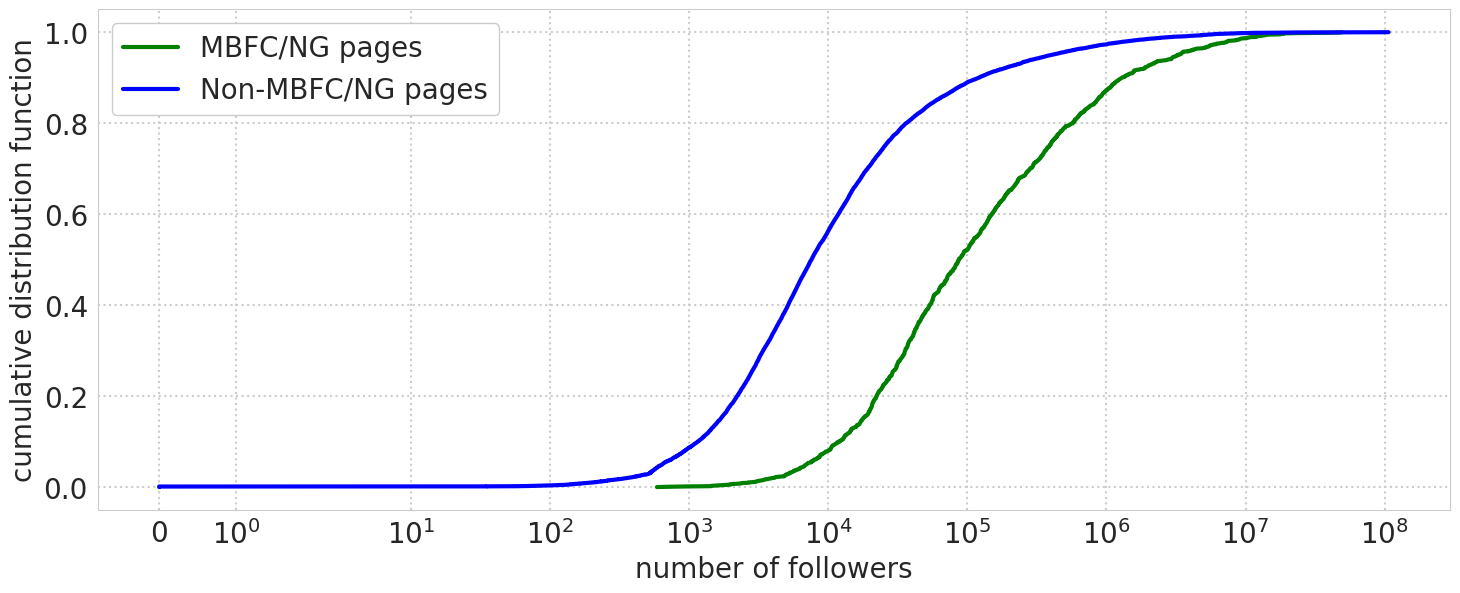

/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


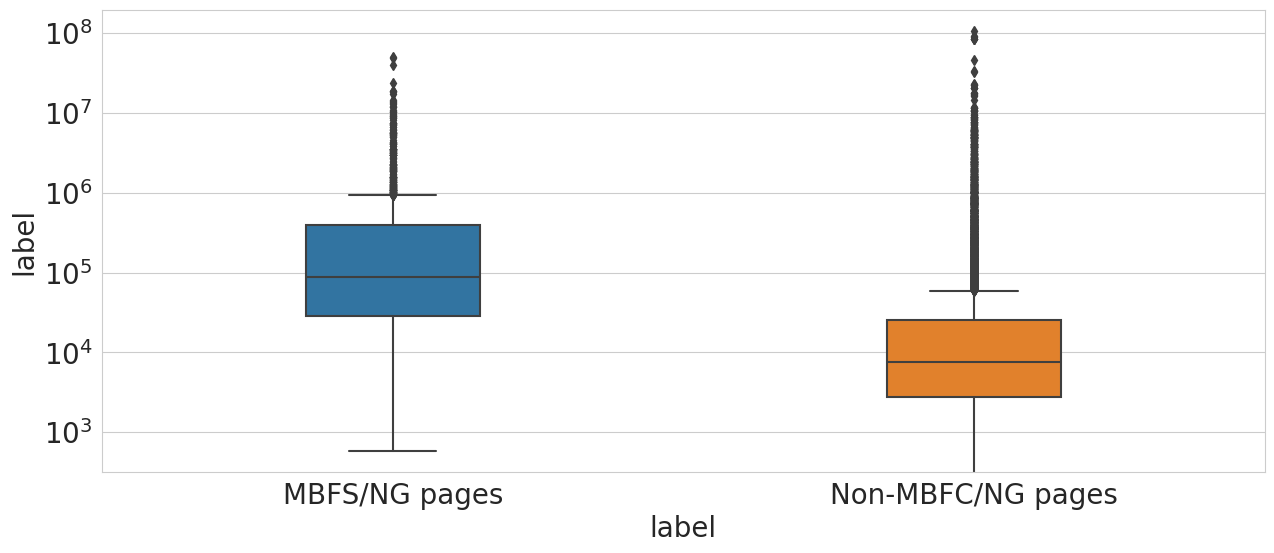

Median number of followers for listed pages 86817.0
Median number of followers for non listed pages 7576.0
144082.00000000012


In [22]:
listed_followers = LISTED_PAGES["currentFollowers"].to_list()
not_listed_followers = NONLISTED_PAGES["currentFollowers"].to_list()

cdf([listed_followers, not_listed_followers], ["MBFC/NG pages", "Non-MBFC/NG pages"], "", x_title="number of followers",colors= ['green','blue'], filename="figures/number_of_followers_covered_vs_not_covered.pdf", xlog=True)

df_for_boxplot = [{"type":"MBFS/NG pages", "# Followers" : item} for item in listed_followers]
df_for_boxplot += [{"type":"Non-MBFC/NG pages", "# Followers" : item} for item in not_listed_followers]
df_for_boxplot = pd.DataFrame(df_for_boxplot)
boxplot(df_for_boxplot, "label", "label", x="type", y="# Followers")

print("Median number of followers for listed pages", np.median(listed_followers))
print("Median number of followers for non listed pages", np.median(not_listed_followers))

print(np.percentile(not_listed_followers, 91))

#HNA


### Non listed pages with high numbers of followers

In [10]:
NONLISTED_PAGES.sort_values(by=['currentFollowers'], ascending=False).head(10)

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,age
1685,2590,2590,2590,2590,2590,2590,1614251518827491,Tasty,2017-06-19,2022-06-20,0.0,106667850.0,MEDIA_NEWS_COMPANY,91758,7.277620e+08,2.777717e+06,2581821.0,262,True,True,en,US,45.87175,0.672421,53.455829,buzzfeed.com | tasty.co | buzzfeednews.com,buzzfeed.com,3,350.221374,351.563218,1,2015-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Tasty'],124,US,en,MEDIA_NEWS_COMPANY,1,2,1,1,0.0,"United States (160), United Kingdom (12), Ind...",BuzzFeed,NaN,US,NaN,198.0,11.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1614251518...,2020-10-01,2022-06-02,28,15,8.367123
15445,23765,23765,23765,23765,23765,23770,138825536219512,Netflix,2017-06-19,2022-06-20,0.0,91807470.0,MEDIA_NEWS_COMPANY,3893,1.140953e+08,4.354781e+05,221428.5,262,True,True,en,US,0.4623683534549191,16.850757770357053,82.68687387618803,netflix.com | eventbrite.co.uk,netflix.com,2,14.858779,14.915709,1,2011-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Netflix'],55,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (114), India (45), United Kingd...","Netflix, Inc.","Los Gatos, Santa Clara County, California, Uni...",US,US,231.0,17.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1388255362...,2020-10-01,2022-06-02,21,20,12.117808
7223,11092,11092,11092,11092,11092,11094,6275848869,Netflix,2017-06-19,2022-06-20,0.0,88421232.0,MEDIA_NEWS_COMPANY,4920,1.638104e+08,6.276259e+05,547898.0,261,True,True,en,US,0.365854,9.878049,89.756098,NaN,NaN,1,18.850575,18.850575,1,2007-11,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Netflix'],61,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,"United States (142), India (45), Netherlands ...","Netflix, Inc.","Los Gatos, Santa Clara County, California, Uni...",US,US,237.0,17.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/6275848869...,2020-10-01,2022-06-02,20,23,16.035616
3214,4971,4971,4971,4971,4971,4971,304747616543178,Netflix,2017-06-19,2022-06-20,0.0,84491022.0,MEDIA_NEWS_COMPANY,3585,1.122920e+08,4.369339e+05,236765.0,257,True,True,en,US,0.055788,57.852162,42.09205,NaN,NaN,1,13.949416,13.735632,1,2016-08,['US'],"['tl', 'en']",['MEDIA_NEWS_COMPANY'],['Netflix'],39,US,tl,MEDIA_NEWS_COMPANY,1,2,1,1,1.0,"United States (111), India (43), Singapore (2...","Netflix, Inc.","Los Gatos, Santa Clara County, California, Uni...",US,US,226.0,19.0,False,NaN,-1,-1,2020-10-03,True,True,True,../data/pages_posts_history_minhkha/3047476165...,2020-10-03,2022-06-02,7,20,7.279452
5504,8474,8474,8474,8474,8474,8475,1781104715514072,Netflix,2017-07-03,2022-06-20,0.0,83530764.0,MEDIA_NEWS_COMPANY,3103,1.413901e+07,5.438082e+04,3480.0,260,True,True,en,US,0.0,41.347083,58.652917,NaN,NaN,1,11.934615,11.980695,1,2017-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Netflix'],16,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (107), India (42), Netherlands ...","Netflix, Inc.","Los Gatos, Santa Clara County, California, Uni...",US,US,209.0,17.0,False,NaN,-1,-1,20

### Total followers for combined pages

In [11]:
print("sum of followers for listed pages    ", sum(LISTED_PAGES["currentFollowers"].to_list()))
print("sum of followers for non-listed pages", sum(NONLISTED_PAGES["currentFollowers"].to_list()))

sum of followers for listed pages     1095845198.0
sum of followers for non-listed pages 2651529840.0


### Most popular pages per organization

In [12]:
NONLISTED_PAGES[NONLISTED_PAGES["page_category"] == "BROADCASTING_MEDIA_PRODUCTION"].sort_values(by=['currentFollowers'], ascending=False).head(30)


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,age
15825,24379,24379,24379,24379,24379,24384,107787352370,Power of Positivity,2017-06-19,2022-06-20,0.0,33114121.0,BROADCASTING_MEDIA_PRODUCTION,50218,1.045480e+09,3.990383e+06,3905206.5,262,True,True,en,US,54.27934206858099,36.672109602134704,9.048548329284316,powerofpositivity.com,powerofpositivity.com,1,191.671756,192.406130,1,2009-07,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['Power of Positivity'],32,US,en,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,0.0,"United States (5), Macedonia (2), Philippines...","POWER OF POSITIVITY, LLC","Asheville, Buncombe County, North Carolina, Un...",US,US,11.0,5.0,False,NaN,-1,-1,2020-10-04,True,True,True,../data/pages_posts_history_minhkha/1077873523...,2020-10-04,2022-06-02,11,15,14.369863
5073,7802,7802,7802,7802,7802,7803,351574300169,VOA Burmese,2017-06-26,2022-06-20,0.0,17561882.0,BROADCASTING_MEDIA_PRODUCTION,43481,2.920533e+08,1.118978e+06,619470.0,261,True,True,-,US,57.799959,5.802534,36.397507,voanews.com,voanews.com,1,166.593870,167.234615,1,2010-02,['US'],['my'],['BROADCASTING_MEDIA_PRODUCTION'],['VOA Burmese'],113,US,my,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,2.0,"United States (25), Thailand (3), Myanmar (1)",Voice of America - International Broadcasting ...,NaN,US,NaN,29.0,3.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/3515743001...,2020-10-01,2022-06-02,29,20,13.780822
5497,8466,8466,8466,8466,8466,8467,270716076407405,OnDemandKorea - English,2017-06-19,2022-06-20,0.0,11930733.0,BROADCASTING_MEDIA_PRODUCTION,10083,1.537231e+08,5.867293e+05,383709.5,262,True,True,en,US,34.087077,2.251314,63.661609,ondemandkorea.com | zapzee.net | allkpop.com |...,ondemandkorea.com,5,38.484733,38.632184,1,2013-05,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['OnDemandKorea - English'],25,US,en,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,1.0,"United States (18), South Korea (8)",ODK MEDIA INC,"Fullerton, Orange County, California, United S...",US,US,26.0,2.0,False,NaN,-1,-1,2020-10-05,True,True,True,../data/pages_posts_history_minhkha/2707160764...,2020-10-05,2022-06-02,9,13,10.534247
53,78,78,78,78,78,78,30776016407,George Lopez,2017-06-26,2022-06-20,0.0,8871836.0,BROADCASTING_MEDIA_PRODUCTION,2465,1.218961e+07,5.209234e+04,42450.5,234,True,True,en,US,4.462475,56.916836,38.62069,spin.com | gofundme.com | ticketmaster.com | p...,spin.com,23,10.534188,9.480769,1,2008-09,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['George Lopez'],4,US,en,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,0.0,"United States (22), United Kingdom (6), Germa...",NaN,NaN,US,NaN,29.0,3.0,False,NaN,-1,-1,2020-10-19,True,False,True,../data/pages_posts_history_minhkha/3077601640...,2020-10-19,2015-01-01,5,0,15.200000
9508,14569,14569,14569,14569,14569,14573,181861021831773,2 Chainz,2017-06-26,2022-06-20,0.0,8844960.0,BROADCASTING_MEDIA_PRODUCTION,566,1.866752e+06,9.061903e+03,4117.0,206,True,True,en,US,3.1802120141342765,45.40636042402827,51.41342756183745,hakkasangroup

In [13]:
PAGES_WITH_ORGA = US_PAGES[US_PAGES['adLib_Organization'].notnull()].reset_index()
organizations = list(set(PAGES_WITH_ORGA["adLib_Organization"].to_list()))

df = []

for organization in organizations:
    listed = LISTED_PAGES[LISTED_PAGES["adLib_Organization"] == organization].shape[0]
    non_listed = NONLISTED_PAGES[NONLISTED_PAGES["adLib_Organization"] == organization].shape[0]
    
    df.append({"organization": organization, "listed": listed, "non_listed" : non_listed, "total": listed + non_listed})
    
df = pd.DataFrame(df)


print("number of pages with organizations:", PAGES_WITH_ORGA.shape[0], "fraction:", PAGES_WITH_ORGA.shape[0]/US_PAGES.shape[0])
print()
print("Number of organizations: ", df.shape[0])
print()
print()
print("Number of organizations with at least 2 pages: ", df[df["total"]>1].shape[0])
print()
print()
print("top 20 organizations: ")
df.sort_values(by="total", ascending = False).head(20)



number of pages with organizations: 7277 fraction: 0.43945890452322

Number of organizations:  3043


Number of organizations with at least 2 pages:  406


top 20 organizations: 


,organization,listed,non_listed,total
460,"Particle Media, Inc.",0,928,928
1770,"PLANCK, LLC",1,552,553
2716,"GANNETT SATELLITE INFORMATION NETWORK, LLC",88,106,194
1094,GATEHOUSE MEDIA LLC,72,56,128
560,"TOWNSQUARE MEDIA, INC.",3,113,116
2742,Lee Enterprises Incorporated,57,50,107
141,ENTERCOM COMMUNICATIONS CORP.,2,81,83
1182,"GRAY TELEVISION, INC.",54,27,81
1669,BuzzFeed,2,50,52
2797,Sinclair Broadcast Group Inc.,37,14,51


In [14]:
NONLISTED_PAGES[NONLISTED_PAGES["adLib_Organization"] == "GANNETT SATELLITE INFORMATION NETWORK, LLC"].sort_values("currentFollowers", ascending=False)



,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,age
5975,9198,9198,9198,9198,9198,9199,480464022311783,Animalkind,2017-09-18,2022-01-31,0.0,5793630.0,MEDIA_NEWS_COMPANY,2076,48970621.0,227770.330233,49387.0,215,True,False,en,US,2.697495,1.734104,95.568401,secondstreetapp.com | freep.com | usatoday.com,secondstreetapp.com,3,9.655814,9.105263,0,2017-09,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Animalkind'],4,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,2.0,United States (23),"GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,23.0,1.0,False,NaN,-1,-1,2020-10-02,True,False,True,../data/pages_posts_history_minhkha/4804640223...,2020-10-02,2015-01-01,5,0,6.194521
2428,3758,3758,3758,3758,3758,3758,158095147555989,USA TODAY Sports,2017-06-19,2022-06-20,0.0,1139382.0,MEDIA_NEWS_COMPANY,48953,8641706.0,32983.610687,23110.0,262,True,True,en,US,85.692399,5.672788,8.634813,usatoday.com | usatodayhss.com | mmajunkie.com...,usatoday.com,7,186.843511,187.559387,1,2010-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['USA TODAY Sports'],659,US,en,MEDIA_NEWS_COMPANY,1,2,1,1,1.0,"United States (75), United Kingdom (2)","GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,77.0,2.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1580951475...,2020-10-01,2022-06-02,30,30,13.117808
12761,19627,19627,19627,19627,19627,19631,137698179626815,USA TODAY Life,2017-06-19,2022-06-20,0.0,900365.0,MEDIA_NEWS_COMPANY,33740,7599448.0,29005.526718,19282.0,262,True,True,en,US,96.47895672791935,1.4226437462951984,2.0983995257854247,usatoday.com,usatoday.com,1,128.778626,129.272031,1,2011-01,['US'],['en'],['MEDIA_NEWS_COMPANY'],['USA TODAY Life'],419,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,United States (70),"GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,70.0,1.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1376981796...,2020-10-01,2022-06-02,30,30,12.865753
14255,21987,21987,21987,21987,21987,21991,105550656158763,MMA Junkie,2017-06-19,2022-06-20,0.0,871154.0,NEWS_SITE,42516,11467987.0,43770.942748,32964.5,262,True,True,en,US,87.32477185059744,2.058048734594036,10.617179414808533,usatoday.com | mmajunkie.com,usatoday.com,2,162.274809,162.896552,1,2010-06,['US'],['en'],['NEWS_SITE'],['MMA Junkie'],280,US,en,NEWS_SITE,1,1,1,1,2.0,"United States (47), United Kingdom (1)","GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,48.0,2.0,False,NaN,-1,-1,2020-10-02,True,True,True,../data/pages_posts_history_minhkha/1055506561...,2020-10-02,2022-06-02,22,25,13.452055
14694,22644,22644,22644,22644,22644,22649,115535341805950,USA TODAY Travel,2017-06-19,2022-06-20,0.0,590938.0,MEDIA_NEWS_COMPANY,13570,1790670.0,6860.804598,3029.0,261,True,True,en,US,91.12011790714811,1.3485630066322771,7.5313190862195984,usatoday.com | 10best.com | northjersey.com | ...

In [15]:
LISTED_PAGES[LISTED_PAGES["adLib_Organization"] == "GANNETT SATELLITE INFORMATION NETWORK, LLC"].sort_values("currentFollowers", ascending=False)



,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,age
7335,11260,11260,11260,11260,11260,11262,13652355666,USA TODAY,2017-06-19,2022-06-20,0.0,9259751.0,MEDIA_NEWS_COMPANY,74614,166684019.0,636198.545802,593369.5,262,True,True,en,US,84.232182,6.095371,9.672448,usatoday.com,usatoday.com,1,284.786260,285.877395,1,2008-04,['US'],['en'],['MEDIA_NEWS_COMPANY'],['USA TODAY'],1186,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,2.0,"United States (136), India (2), United Kingdo...","GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,139.0,3.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/1365235566...,2020-10-01,2022-06-02,30,30,15.619178
2762,4299,4299,4299,4299,4299,4299,13642915529,Detroit Free Press,2017-06-19,2022-06-20,0.0,599071.0,MEDIA_NEWS_COMPANY,48442,27903919.0,106503.507634,93459.5,262,True,True,en,US,94.228149,2.807481,2.96437,freep.com | usatoday.com | secondstreetapp.com,freep.com,3,184.893130,185.601533,1,2008-02,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Detroit Free Press'],457,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,"United States (101), Israel (17), Canada (1),...","GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,122.0,6.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/1364291552...,2020-10-01,2022-06-02,30,30,15.783562
13513,20791,20791,20791,20791,20791,20795,50978409031,azcentral,2017-06-19,2022-06-20,0.0,587918.0,NEWS_SITE,41624,14903995.0,56885.477099,44274.0,262,True,True,en,US,92.92475494906785,1.5231597155487218,5.552085335383439,azcentral.com | usatoday.com,azcentral.com,2,158.870229,159.478927,1,2009-02,['US'],['en'],['NEWS_SITE'],['azcentral'],365,US,en,NEWS_SITE,1,2,1,1,1.0,"United States (95), Israel (10), United Kingd...","GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,106.0,3.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/5097840903...,2020-10-01,2022-06-02,30,30,14.780822
11415,17501,17501,17501,17501,17501,17505,117907407522,NorthJersey.com,2017-06-19,2022-06-20,0.0,446261.0,TOPIC_NEWSPAPER,27603,4554240.0,17382.595420,12595.0,262,True,True,en,US,91.30167010832156,3.2134188312864542,5.4849110603919815,northjersey.com | secondstreetapp.com,northjersey.com,2,105.354962,105.758621,1,2009-08,['US'],['en'],['TOPIC_NEWSPAPER'],['NorthJersey.com'],174,US,en,TOPIC_NEWSPAPER,1,1,1,1,0.0,"United States (95), Israel (10), United Kingd...","GANNETT SATELLITE INFORMATION NETWORK, LLC","Portland, Multnomah County, Oregon, United States",US,US,106.0,3.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/1179074075...,2020-10-01,2022-06-02,30,28,14.284932
578,894,894,894,894,894,894,83300095936,Florida Today,2017-06-19,2022-06-20,0.0,352458.0,TOPIC_NEWSPAPER,37505,6734380.0,25703.740458,16702.5,262,True,True,en,US,87.588322,5.337955,7.073724,floridatoday.com | usatoday.co

In [16]:
NONLISTED_PAGES[NONLISTED_PAGES["adLib_Organization"] == "Sinclair Broadcast Group Inc."].sort_values("currentFollowers", ascending=False)


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,age
11193,17147,17147,17147,17147,17147,17151,25963305308,TENNIS.com,2017-06-19,2022-06-20,0.0,517738.0,MEDIA_NEWS_COMPANY,21694,7851326.0,29966.893130,22371.5,262,True,True,en,US,76.70323591776528,13.653544758919518,9.643219323315192,tennis.com | tnns.co | bsltnns.co | tnns.ch,tennis.com,4,82.801527,83.118774,1,2008-06,['US'],['en'],['MEDIA_NEWS_COMPANY'],['TENNIS.com'],156,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,"United States (57), Philippines (2)",Sinclair Broadcast Group Inc.,"Hunt Valley, 98, Shawan Road, Hunt Valley, Coc...",US,US,59.0,2.0,False,NaN,-1,-1,2020-10-03,True,True,True,../data/pages_posts_history_minhkha/2596330530...,2020-10-03,2022-06-02,15,21,15.452055
12752,19614,19614,19614,19614,19614,19618,117923841552664,CBS 2 Boise,2017-06-19,2022-06-20,0.0,202115.0,MEDIA_NEWS_COMPANY,45932,12847477.0,49036.171756,26076.0,262,True,True,en,US,68.97805451537054,8.157711399460071,22.864234085169382,idahonews.com | komonews.com | local21news.com...,idahonews.com,5,175.312977,175.984674,1,2010-04,['US'],['en'],['MEDIA_NEWS_COMPANY'],['CBS 2 Boise'],428,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,2.0,"United States (62), Philippines (2)",Sinclair Broadcast Group Inc.,"Hunt Valley, 98, Shawan Road, Hunt Valley, Coc...",US,US,64.0,2.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1179238415...,2020-10-01,2022-06-02,30,29,13.619178
3388,5231,5231,5231,5231,5231,5232,75625516631,FOX56 WOLF TV,2017-06-19,2022-06-20,0.0,85562.0,BROADCASTING_MEDIA_PRODUCTION,34536,1086751.0,4147.904580,3116.0,262,True,True,en,US,69.20315,11.084086,19.712763,fox56.com | burst.com | twitter.com | ew.com |...,fox56.com,11,131.816794,132.321839,1,2009-03,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['FOX56 WOLF TV'],435,US,en,BROADCASTING_MEDIA_PRODUCTION,1,2,1,1,1.0,"United States (55), Philippines (2)",Sinclair Broadcast Group Inc.,"Hunt Valley, 98, Shawan Road, Hunt Valley, Coc...",US,US,57.0,2.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/7562551663...,2020-10-01,2022-06-02,30,27,14.704110
13593,20918,20918,20918,20918,20918,20922,394287324102292,Full Measure with Sharyl Attkisson,2017-06-19,2022-06-20,0.0,46000.0,BROADCASTING_MEDIA_PRODUCTION,3405,333828.0,1293.906977,1033.0,258,True,True,en,US,8.898678414096919,29.45668135095448,61.64464023494861,fullmeasure.news | instagram.com,fullmeasure.news,2,13.197674,13.045977,1,2015-08,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['Full Measure with Sharyl Attkisson'],11,US,en,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,0.0,United States (37),Sinclair Broadcast Group Inc.,"Hunt Valley, Cockeysville, Baltimore County, M...",US,US,37.0,1.0,False,NaN,-1,-1,2020-10-04,True,True,True,../data/pages_posts_history_minhkha/3942873241...,2020-10-04,2022-06-12,7,2,8.282192
12556,19311,19311,19311,19311,19311,19315,140372130960,CBS4 News - WGFL,2017-06-19,2022-06-20,0.0,35318.0,BROADCASTING_MEDIA_PRODUCTION,15313,780753.0,2979.973282

In [17]:
LISTED_PAGES[LISTED_PAGES["adLib_Organization"] == "Sinclair Broadcast Group Inc."].sort_values("currentFollowers", ascending=False)


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,age
2066,3195,3195,3195,3195,3195,3195,442430012490396,The National Desk - TND,2017-06-19,2022-06-20,0.0,2998926.0,MEDIA_NEWS_COMPANY,67115,82117984.0,313427.419847,105544.5,262,True,True,en,US,62.276689,0.295016,37.428295,thenationaldesk.com | circa.com | wjla.com | k...,thenationaldesk.com,33,256.164122,257.145594,1,2012-12,['US'],['en'],['MEDIA_NEWS_COMPANY'],['The National Desk - TND'],1205,US,en,MEDIA_NEWS_COMPANY,1,2,1,1,2.0,United States (55),Sinclair Broadcast Group Inc.,"Hunt Valley, 98, Shawan Road, Hunt Valley, Coc...",US,US,55.0,1.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/4424300124...,2020-10-01,2022-06-02,30,30,10.947945
16048,24719,24719,24719,24719,24719,24724,343035347444,News 4 San Antonio,2020-02-03,2022-06-20,567308.0,960410.0,BROADCASTING_MEDIA_PRODUCTION,100000,47030440.0,376243.520000,279265.0,125,True,True,en,US,70.203,12.673,17.123999999999995,news4sanantonio.com | foxsanantonio.com | jbsa...,news4sanantonio.com,3,800.000000,806.451613,1,2010-03,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['News 4 San Antonio'],1872,US,en,BROADCASTING_MEDIA_PRODUCTION,1,2,1,1,1.0,"United States (83), Philippines (2)",Sinclair Broadcast Group Inc.,"Hunt Valley, Cockeysville, Baltimore County, M...",US,US,85.0,2.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/3430353474...,2020-10-01,2022-06-02,30,30,13.704110
4731,7250,7250,7250,7250,7250,7251,75155261177,ABC 33/40,2017-06-19,2022-06-20,0.0,870907.0,BROADCASTING_MEDIA_PRODUCTION,41875,39502377.0,150772.431298,79003.0,262,True,True,en,US,79.665672,5.616716,14.717612,abc3340.com | go.com | news4sanantonio.com | m...,abc3340.com,4,159.828244,160.440613,1,2009-04,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['ABC 33/40'],504,US,en,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,0.0,"United States (57), Philippines (2)",Sinclair Broadcast Group Inc.,"Hunt Valley, 98, Shawan Road, Hunt Valley, Coc...",US,US,59.0,2.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/7515526117...,2020-10-01,2022-06-02,30,30,14.619178
12977,19954,19954,19954,19954,19954,19958,35996547940,CBS 12 News,2017-06-19,2022-06-20,0.0,757013.0,BROADCASTING_MEDIA_PRODUCTION,73864,25301917.0,96572.202290,48565.0,262,True,True,en,US,73.2169933932633,6.426676053287122,20.35633055344957,cbs12.com | outlook.com,cbs12.com,2,281.923664,283.003831,1,2008-11,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['CBS 12 News'],778,US,en,BROADCASTING_MEDIA_PRODUCTION,1,2,1,1,0.0,"United States (77), Philippines (2)",Sinclair Broadcast Group Inc.,"Hunt Valley, Cockeysville, Baltimore County, M...",US,US,79.0,2.0,False,NaN,-1,-1,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/3599654794...,2020-10-01,2022-06-02,30,30,15.032877
5501,8471,8471,8471,8471,8471,8472,100764596991,"LOCAL 12, WKRC-TV",2017-06-19,2022-06-20,0.0,690401.0,MEDIA_NEWS_COMPANY,73357,45685482.0,174372.068702,16130

# 2. Verified pages

### Overall numbers

In [18]:
verified_listed_pages = LISTED_PAGES[LISTED_PAGES["page_verified"] == True]
verified_nonlisted_pages = NONLISTED_PAGES[NONLISTED_PAGES["page_verified"] == True]

print("Number of verified listed pages", verified_listed_pages.shape[0], "Fraction", verified_listed_pages.shape[0]/LISTED_PAGES.shape[0])

print("Number of verified non listed pages", verified_nonlisted_pages.shape[0], "Fraction", verified_nonlisted_pages.shape[0]/NONLISTED_PAGES.shape[0])



Number of verified listed pages 983 Fraction 0.6668928086838535
Number of verified non listed pages 4097 Fraction 0.2715942989724892


### Distribution

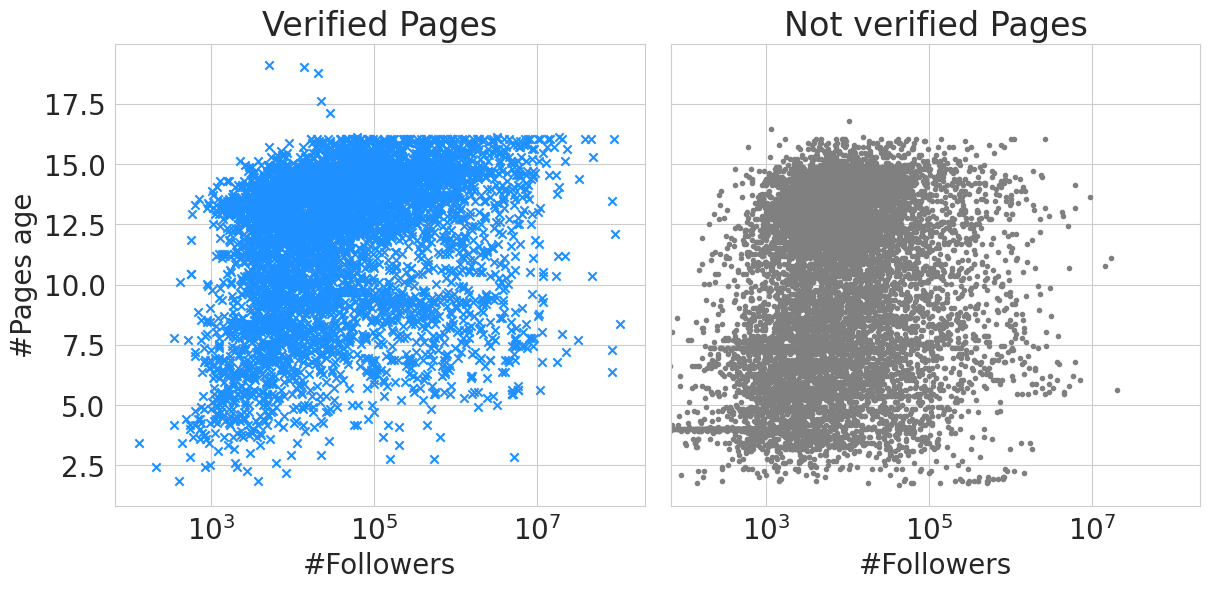

In [19]:
fig,axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(14,6))
pages_verified = US_PAGES[US_PAGES.page_verified==1]
pages_notverified = US_PAGES[US_PAGES.page_verified==0]
axes[0].scatter(pages_verified['currentFollowers'].to_list(), pages_verified['age'].to_list(),marker='x', color='dodgerblue')
# axes[0].xaxis.set_major_formatter(FuncFormatter(fmt_expo))
axes[0].set_xlabel('#Followers')
axes[0].set_ylabel('#Pages age')
axes[0].set_xscale('log')
axes[0].set_title('Verified Pages')

axes[1].scatter(pages_notverified['currentFollowers'].to_list(), pages_notverified['age'].to_list(),marker='.', color='grey')
# axes[1].xaxis.set_major_formatter(FuncFormatter(fmt_expo))
axes[1].set_xlabel('#Followers')
axes[1].set_title('Not verified Pages')
plt.subplots_adjust(hspace=0.05, wspace=0.05)

plt.show()